# Experiment 3
## Test one strategy to select best k features
Strategy: Train polinomial regression model using one feature at time, and select those preset minor error 

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.pipeline import make_pipeline

DATASET_PATH = "datasets/"

def load_song_data(dataset_path=DATASET_PATH):
    df = pd.read_csv(dataset_path + 'year-prediction-msd-train.txt', sep=",", header=None)
    return df

In [2]:
#songs é um DataFrame
songs = load_song_data()

In [3]:
songs_x = songs.iloc[:,1:]
songs_y = songs.iloc[:,0]
songs_y.shape

(463715,)

In [4]:
#Normalizing
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
songs_x = num_pipeline.fit_transform(songs_x)

In [5]:
rmse_by_features=[]
r2_by_features=[]

#Cheking error for each feature
for count in range (0,90):
    songs_1x=songs_x[:,count]
    rmse_scores = []
    r2_scores = []

    #Cross validation with 10-folds
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(songs_1x):
        songs_x_train, songs_x_test = songs_1x[train_index], songs_1x[test_index]
        songs_y_train, songs_y_test = songs_y[train_index], songs_y[test_index]
        songs_x_train=songs_x_train.reshape(-1,1)
        songs_x_test=songs_x_test.reshape(-1,1)

        regr = make_pipeline(PolynomialFeatures(2), Ridge())
        regr.named_steps['ridge'].fit(songs_x_train, songs_y_train)
        songs_y_pred = regr.named_steps['ridge'].predict(songs_x_test)

        songs_y_pred = songs_y_pred.round()
        rmse_scores.append(np.sqrt(mean_squared_error(songs_y_test, songs_y_pred)))
        r2_scores.append(r2_score(songs_y_test, songs_y_pred))

    rmse_by_features.append(sum(rmse_scores)/float(len(rmse_scores)))

In [6]:
#Saving the index in the error array
rmse_by_features=np.array(rmse_by_features)
rmse_by_features=rmse_by_features.reshape(-1,1)

rmse_by_features=np.insert(rmse_by_features,1,range(0,90),axis=1)
rmse_by_features


array([[ 10.65784939,   0.        ],
       [ 10.9442769 ,   1.        ],
       [ 10.83842537,   2.        ],
       [ 10.94663406,   3.        ],
       [ 10.94779836,   4.        ],
       [ 10.74754234,   5.        ],
       [ 10.875764  ,   6.        ],
       [ 10.93768516,   7.        ],
       [ 10.95208666,   8.        ],
       [ 10.92762991,   9.        ],
       [ 10.946434  ,  10.        ],
       [ 10.89120364,  11.        ],
       [ 10.93658179,  12.        ],
       [ 10.91350639,  13.        ],
       [ 10.93585557,  14.        ],
       [ 10.93336873,  15.        ],
       [ 10.93452073,  16.        ],
       [ 10.93788097,  17.        ],
       [ 10.94648232,  18.        ],
       [ 10.90435649,  19.        ],
       [ 10.92621513,  20.        ],
       [ 10.9202161 ,  21.        ],
       [ 10.9254422 ,  22.        ],
       [ 10.92556737,  23.        ],
       [ 10.91752442,  24.        ],
       [ 10.93976646,  25.        ],
       [ 10.94743451,  26.        ],
 

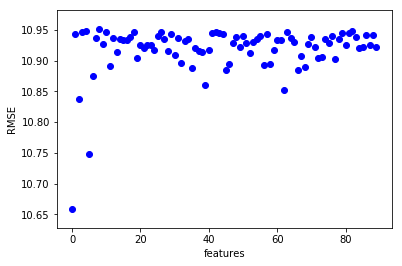

In [7]:
#ploting error by feature
plt.xlabel("features")
plt.ylabel("RMSE")
plt.scatter(rmse_by_features[:,1], rmse_by_features[:,0],  color='blue')

In [8]:
def getKey(item):
     return item[0]
sorted(rmse_by_features, key=getKey)

[array([ 10.65784939,   0.        ]),
 array([ 10.74754234,   5.        ]),
 array([ 10.83842537,   2.        ]),
 array([ 10.8527913,  62.       ]),
 array([ 10.85993026,  39.        ]),
 array([ 10.875764,   6.      ]),
 array([ 10.88460251,  45.        ]),
 array([ 10.88565205,  66.        ]),
 array([ 10.88747262,  35.        ]),
 array([ 10.88907804,  68.        ]),
 array([ 10.89120364,  11.        ]),
 array([ 10.89334184,  56.        ]),
 array([ 10.89387348,  46.        ]),
 array([ 10.89511542,  58.        ]),
 array([ 10.89682055,  32.        ]),
 array([ 10.90277262,  77.        ]),
 array([ 10.90435649,  19.        ]),
 array([ 10.90498201,  72.        ]),
 array([ 10.9057547,  73.       ]),
 array([ 10.90719369,  67.        ]),
 array([ 10.90971508,  30.        ]),
 array([ 10.913018,  52.      ]),
 array([ 10.91350639,  13.        ]),
 array([ 10.91413519,  38.        ]),
 array([ 10.91501248,  28.        ]),
 array([ 10.91568697,  37.        ]),
 array([ 10.91701075,  5

In [9]:
#Selecting the better features (less error)
#The features are: 0,2,5,6,39 e 62. But songs has collumn 0 as target (year), so we increment 1 in indexs 
songs_x = songs.iloc[:,[1,3,6,7,40,63]]
songs_y = songs.iloc[:,0]

songs_x = num_pipeline.fit_transform(songs_x)


## Training the model using the features selected (k best)


In [10]:
rmse_scores=[]
r2_scores=[]

#Cross validation with 10-folds
kf = KFold(n_splits=10, shuffle=True, random_state=1)
for train_index, test_index in kf.split(songs_x):
    songs_x_train, songs_x_test = songs_x[train_index], songs_x[test_index]
    songs_y_train, songs_y_test = songs_y[train_index], songs_y[test_index]

    regr = make_pipeline(PolynomialFeatures(3), Ridge())
    regr.named_steps['ridge'].fit(songs_x_train, songs_y_train)
    songs_y_pred = regr.named_steps['ridge'].predict(songs_x_test)

    songs_y_pred = songs_y_pred.round()
    rmse_scores.append(np.sqrt(mean_squared_error(songs_y_test, songs_y_pred)))
    r2_scores.append(r2_score(songs_y_test, songs_y_pred))

rmse_mean=sum(rmse_scores)/float(len(rmse_scores))
print(rmse_mean)
print(rmse_scores)

10.3289457156
[10.37508307586938, 10.264228899117079, 10.310324460317046, 10.338432367521737, 10.26794692544031, 10.38348914075161, 10.312127589186883, 10.342404128371594, 10.368561260067983, 10.32685930978813]


In [11]:
#Correlation between each features and the year (target)
corr_matrix=songs.corr()
corr_matrix[0].sort_values(ascending=False)


0     1.000000
1     0.227233
7     0.111172
47    0.096468
20    0.086189
73    0.084049
74    0.082245
68    0.081562
14    0.077826
53    0.073889
38    0.073764
29    0.073483
39    0.070597
25    0.064881
85    0.060670
22    0.048426
70    0.047188
23    0.044947
34    0.042380
10    0.034973
79    0.031883
16    0.031521
11    0.029576
75    0.028776
84    0.028462
17    0.028055
51    0.026662
32    0.026136
87    0.025494
13    0.022796
        ...   
81   -0.039637
37   -0.040936
62   -0.042161
35   -0.043406
48   -0.047816
54   -0.050772
86   -0.053012
66   -0.053313
52   -0.053915
90   -0.055896
21   -0.058737
24   -0.059435
41   -0.061353
50   -0.061713
72   -0.066441
60   -0.066959
31   -0.073348
78   -0.087076
33   -0.091488
59   -0.093444
57   -0.095802
12   -0.097264
69   -0.098398
46   -0.101452
36   -0.101587
67   -0.103275
40   -0.124132
63   -0.127138
3    -0.138384
6    -0.188788
Name: 0, Length: 91, dtype: float64